# tensorflow 테스트

In [3]:
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(8, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',padding='same'), # Output: (7, 7, 8)
    Flatten(), # Output: 392
    # Dense(h, activation='linear') # h를 392로 고정
])

model.summary()

2025-06-20 13:23:03.790354: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-20 13:23:03.797332: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750393383.805515  375460 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750393383.807926  375460 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750393383.814267  375460 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 392)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

# Library Import

In [2]:
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Dense, Flatten, Reshape

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [3]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train= X_train.astype('float32') / 255.0
X_test= X_test.astype('float32') / 255.0

# Check dimensions
print("Training set shape:", X_train.shape)
print("First image shape:", X_train[0].shape)

Training set shape: (60000, 28, 28)
First image shape: (28, 28)


In [4]:
X_train[0].dtype

dtype('float32')

In [5]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# autoencoder


Dense layer의 역할: 컨볼루션 레이어에서 추출된 특징맵을 저차원 벡터로 압축.
        이 저차원 벡터는 오토인코더의 '잠재 공간(latent space)' 또는 '병목 구간(bottleneck)'이라고도 함.

/////////////////////////////////

인코더의 마지막 Dense 레이어(잠재 공간):
Linear(없음): 제한 없이 값을 표현할 수 있게 함
tanh: -1에서 1 사이로 값을 제한하여 안정적인 학습을 도움
cf. 만약 softmax를 쓰면... 분류 문제를 위한 모델이 됨

히든 Dense 레이어:
ReLU: 보통 히든 레이어에서도 ReLU가 좋은 성능을 보임
Leaky ReLU: 더 강건한 학습을 원할 때 사용

디코더의 마지막 Dense 레이어(출력):
Sigmoid: 이미지 픽셀 값이 0~1 사이일 때 사용 (정규화된 이미지)
Linear: 원본 스케일로 복원하고 싶을 때
tanh: 출력 값을 -1~1 사이로 제한하고 싶을 때

In [6]:
"""
# h = 8 # lantent vector
h = 48

# encoder (Sequential)
encoder = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(8, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',padding='same'),
    Flatten(),
    Dense(h, activation='relu')
])

# decoder (Sequential)
decoder = Sequential([
    Dense(7 * 7 * 8, activation='relu', input_shape=(h,)),
    Reshape((7, 7, 8)),
    Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same'),
    Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same'),
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

# Autoencoder (Sequential of Sequential)
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(
    optimizer='adam', # 다른 것도 해보기
    loss='mse' # mae in CAN
)
"""
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

h = 8 # latent

inputs_e = Input(shape=(28,28,1))
hidden1_e = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs_e)
hidden2_e = MaxPooling2D((2, 2), padding='same')(hidden1_e)
hidden3_e = Conv2D(8, (3, 3), activation='relu', padding='same')(hidden2_e)
hidden4_e = MaxPooling2D((2, 2))(hidden3_e)
hidden5_e = Conv2D(8, (3, 3), activation='relu',padding='same')(hidden4_e)
flatten_e = Flatten()(hidden5_e)
outputs_e = Dense(h, activation='relu')(flatten_e)

encoder = Model(inputs=inputs_e, outputs=outputs_e, name="encoder_model")

inputs_d = Input(shape=(h,))
hidden1_d = Dense(7 * 7 * 8, activation='relu', input_shape=(h,))(inputs_d)
hidden2_d = Reshape((7, 7, 8))(hidden1_d)
hidden3_d = Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(hidden2_d)
hidden4_d = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(hidden3_d)
outputs_d = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(hidden4_d)

decoder = Model(inputs = inputs_d, outputs = outputs_d, name="decoder_model")

autoencoder_input = Input(shape=(28, 28, 1))
autoencoder_encoded = encoder(autoencoder_input)
autoencoder_decoded = decoder(autoencoder_encoded)

autoencoder = Model(inputs=autoencoder_input, outputs=autoencoder_decoded, name="autoencoder_model")

autoencoder.compile(
    optimizer='adam', # 다른 것도 해보기
    loss='mse' # mae in CAN
)

# 모델 학습
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, X_test)
)

# 학습된 모델 사용
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

/home/chlee/miniforge3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


I0000 00:00:1750319963.352588  275842 service.cc:152] XLA service 0x76a928021a10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750319963.352602  275842 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti SUPER, Compute Capability 8.9
2025-06-19 16:59:23.371450: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750319963.500259  275842 cuda_dnn.cc:529] Loaded cuDNN version 90300


102/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1596

I0000 00:00:1750319965.227481  275842 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0980

2025-06-19 16:59:26.591984: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_820', 4 bytes spill stores, 4 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0974 - val_loss: 0.0395
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0379 - val_loss: 0.0344
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0344 - val_loss: 0.0330
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0330 - val_loss: 0.0320
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0322 - val_loss: 0.0314
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0314 - val_loss: 0.0309
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0311 - val_loss: 0.0304
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0305 - val_loss: 0.0300
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0303 - val_loss: 0.0297
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0299 - val_loss: 0.0297
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0296 - val_loss: 0.0294
Epoch 12/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


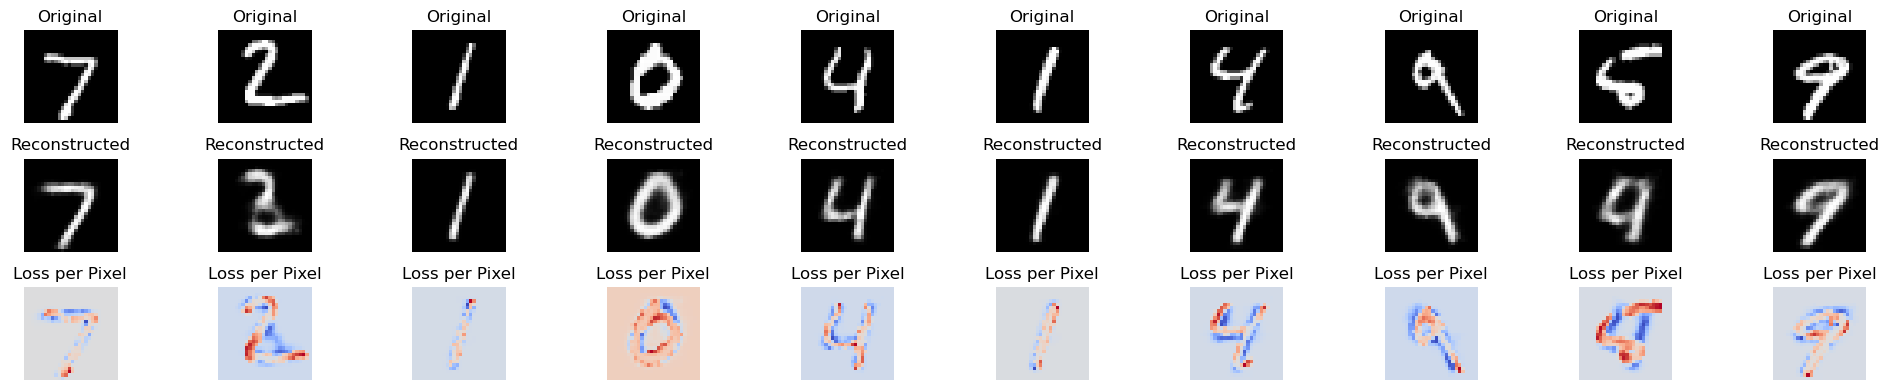

In [7]:
# 필요한 추가 라이브러리
import matplotlib.pyplot as plt

# 모델 예측
encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

# 원본 이미지와 재구성된 이미지 비교 시각화
n = 10  # 표시할 이미지 개수
plt.figure(figsize=(20, 4))

for i in range(n):
    # 원본 이미지
    ax = plt.subplot(3, n, i + 1) # 첫번째 인자 3: 3행으로 만들겠다는 의미
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # 재구성된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

    # 각 픽셀 차이 시각화
    # 픽셀별 차이 계산
    pixel_wise_difference = X_test[i].reshape(28, 28) - decoded_imgs[i].reshape(28, 28) # original_image - reconstructed_image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(pixel_wise_difference, cmap='coolwarm', origin='upper')
    plt.title("Loss per Pixel")
    plt.axis('off')
    
plt.tight_layout()
plt.show()

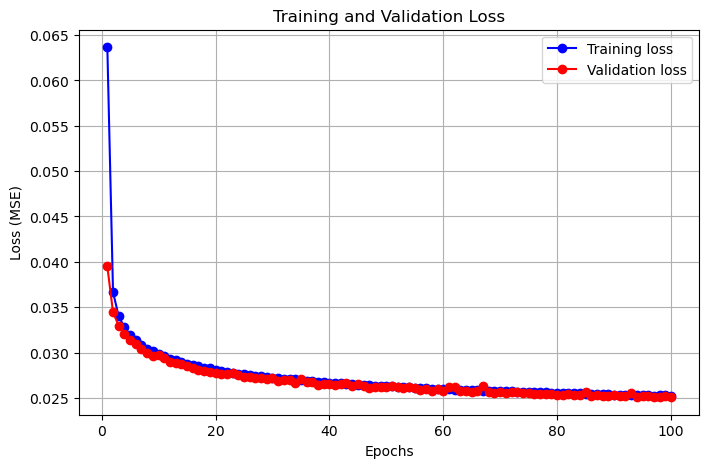

In [8]:
import matplotlib.pyplot as plt

# history 객체에서 loss와 val_loss 가져오기
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# 러닝 커브 시각화
plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from tensorflow.keras.datasets import fashion_mnist
noise_factor = 0.2
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = np.array(x_test_noisy)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step


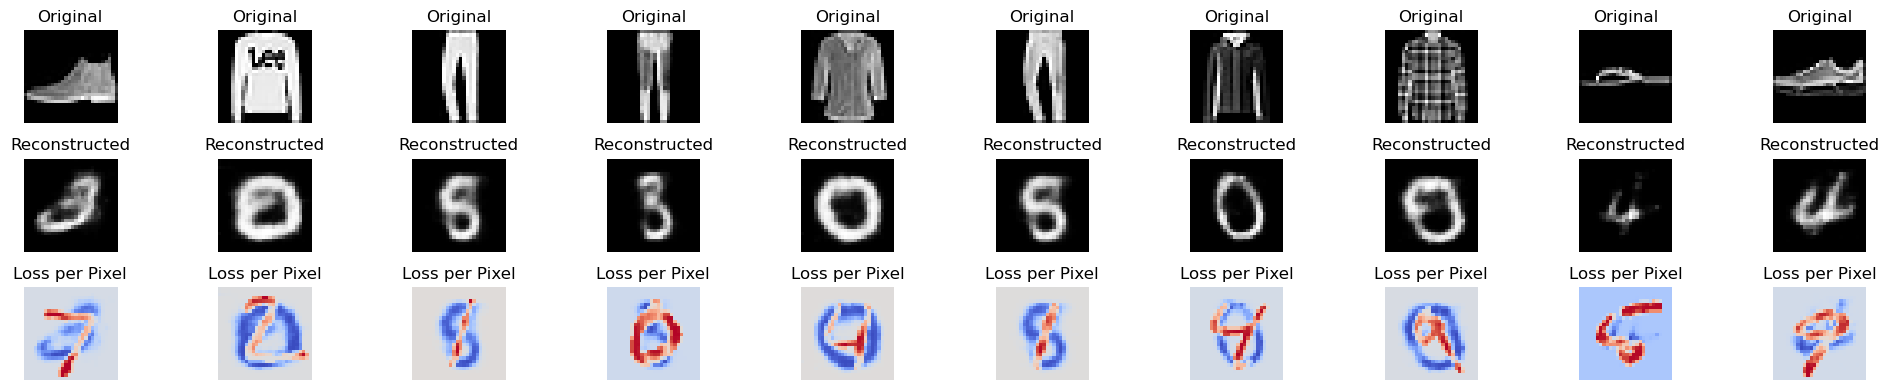

In [10]:
# 필요한 추가 라이브러리
import matplotlib.pyplot as plt

# 모델 예측
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# 원본 이미지와 재구성된 이미지 비교 시각화
n = 10  # 표시할 이미지 개수
plt.figure(figsize=(20, 4))

for i in range(n):
    # 원본 이미지
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # 재구성된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

    # 각 픽셀 차이 시각화
    # 픽셀별 차이 계산
    pixel_wise_difference = X_test[i].reshape(28, 28) - decoded_imgs[i].reshape(28, 28) # original_image - reconstructed_image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(pixel_wise_difference, cmap='coolwarm', origin='upper')
    plt.title("Loss per Pixel")
    plt.axis('off')
    
plt.tight_layout()
plt.show()

# 4/28 랩미팅 준비 (삭제됨1)

# 6/15 연구

In [1]:
# https://wikidocs.net/38861

def make_model_mse(model):
    from keras import models
    import keras.api.ops as K
    input_s = model.inputs[0]
    output_s = model.outputs[0] # autoencodr의 ouput : (a)

    error_s = K.mean(K.square(input_s - output_s), axis=[1, 2, 3]) # (a)에 대한 MSE : (b)
    return models.Model(inputs=input_s, outputs=error_s) # (b)를 return하는 모델

model_mse = make_model_mse(autoencoder)
model_mse.summary()

NameError: name 'autoencoder' is not defined

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model, Sequential
import keras.api.ops as K
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. 데이터 준비 (MNIST 및 Fashion MNIST 사용)

# MNIST 데이터셋 로드 (정상 데이터)
(mnist_X_train, mnist_y_train), (mnist_X_test, mnist_y_test) = tf.keras.datasets.mnist.load_data()

# Fashion MNIST 데이터셋 로드 (이상 데이터)
(fashion_X_train, fashion_y_train), (fashion_X_test, fashion_y_test) = tf.keras.datasets.fashion_mnist.load_data()


2025-06-20 09:06:44.708800: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-20 09:06:44.716244: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750378004.724115  319154 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750378004.726484  319154 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750378004.733072  319154 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [ ]:

# 데이터 전처리 (0-1 스케일링 및 채널 추가)
def preprocess_data(images):
    images = images.astype('float32') / 255.
    images = np.reshape(images, (len(images), 28, 28, 1))
    return images

# 이미지에 노이즈 추가 함수
def add_gaussian_noise(images, noise_factor=0.2):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

# 오토인코더 학습을 위한 정상 데이터 (MNIST의 훈련 데이터 전체 사용)
X_train = preprocess_data(mnist_X_train)

# 테스트 데이터셋 구성
# y_test는 이에 대한 실제 레이블 (0: 정상, 1: 이상)

# MNIST 테스트 셋은 '정상'으로 간주
X_test_normal = preprocess_data(mnist_X_test)
y_test_normal = np.zeros(len(X_test_normal)) # 정상은 0

# Fashion MNIST 테스트 셋은 '이상'으로 간주
X_test_anomaly = preprocess_data(fashion_X_test)
y_test_anomaly = np.ones(len(X_test_anomaly)) # 이상은 1

# 두 데이터를 합쳐서 최종 테스트 셋 구성
X_test_combined = np.concatenate((X_test_normal, X_test_anomaly))
y_test_combined = np.concatenate((y_test_normal, y_test_anomaly))

# -----------------------------------------------------------
# 노이즈 강도 설정
NOISE_FACTOR = 0.7 

# X_test_combined에 노이즈 추가
X_test_noisy = add_gaussian_noise(X_test_combined, noise_factor=NOISE_FACTOR)

# 데이터 셔플링
shuffle_indices = np.arange(len(X_test_noisy))
np.random.shuffle(shuffle_indices)
X_test = X_test_noisy[shuffle_indices]
y_test = y_test_combined[shuffle_indices]


# -----------------------------------------------------------
# 2. h 값에 따른 AUC 성능 그래프 그리기
h_values = [2, 4, 8, 16, 32, 48, 64, 128]
auc_scores = [] # 각 h 값에 대한 AUC 점수를 저장할 리스트

for h in h_values:
    print(f"\n--- Training and evaluating for h = {h} ---")

    # Encoder 정의
    inputs_e = Input(shape=(28,28,1))
    hidden1_e = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs_e)
    hidden2_e = MaxPooling2D((2, 2), padding='same')(hidden1_e)
    hidden3_e = Conv2D(8, (3, 3), activation='relu', padding='same')(hidden2_e)
    hidden4_e = MaxPooling2D((2, 2))(hidden3_e)
    hidden5_e = Conv2D(8, (3, 3), activation='relu',padding='same')(hidden4_e)
    flatten_e = Flatten()(hidden5_e)
    outputs_e = Dense(h, activation='relu')(flatten_e)
    encoder = Model(inputs=inputs_e, outputs=outputs_e, name=f"encoder_model_h{h}")

    # Decoder 정의
    inputs_d = Input(shape=(h,))
    hidden1_d = Dense(7 * 7 * 8, activation='relu')(inputs_d)
    hidden2_d = Reshape((7, 7, 8))(hidden1_d)
    hidden3_d = Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(hidden2_d)
    hidden4_d = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(hidden3_d)
    outputs_d = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(hidden4_d)
    decoder = Model(inputs = inputs_d, outputs = outputs_d, name=f"decoder_model_h{h}")

    # Autoencoder 정의
    autoencoder_input = Input(shape=(28, 28, 1))
    autoencoder_encoded = encoder(autoencoder_input)
    autoencoder_decoded = decoder(autoencoder_encoded)
    autoencoder = Model(inputs=autoencoder_input, outputs=autoencoder_decoded, name=f"autoencoder_model_h{h}")

    autoencoder.compile(
        optimizer='adam',
        loss='mse'
    )

    # 모델 학습
    history = autoencoder.fit(
        X_train, X_train,
        epochs=50,
        batch_size=128,
        shuffle=True,
        validation_data=(X_test, X_test), # 노이즈 추가된 테스트 데이터의 재구성 오차 추적
        verbose=0 # 학습 과정 출력 억제
    )

    # 재구성 오차 계산
    model_mse = make_model_mse(autoencoder)
    reconstruction_errors = model_mse.predict(X_test, verbose=0)

    # AUC-ROC 계산
    fpr, tpr, thresholds = roc_curve(y_test, reconstruction_errors)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc) # 계산된 AUC 값 저장

# # 모든 h 값에 대한 반복이 끝난 후 그래프 그리기
# plt.figure(figsize=(10, 6))
# plt.plot(h_values, auc_scores, marker='o', linestyle='-', color='blue')
# plt.xlabel('Latent Vector Dimension (h)')
# plt.ylabel('AUC-ROC Score')
# plt.title(f'Anomaly Detection Performance vs. Latent Dimension (h) with Noise (Noise Factor: {NOISE_FACTOR})')
# plt.grid(True)
# plt.xticks(h_values) # h_values에 있는 값들을 x축 눈금으로 표시
# plt.ylim([0.5, 1.01]) # Y축 범위를 0.5 (랜덤 추측)부터 1.0까지로 설정
# plt.show()



--- Training and evaluating for h = 2 ---

--- Training and evaluating for h = 4 ---

--- Training and evaluating for h = 8 ---

--- Training and evaluating for h = 16 ---

--- Training and evaluating for h = 32 ---

--- Training and evaluating for h = 48 ---

--- Training and evaluating for h = 64 ---

--- Training and evaluating for h = 128 ---


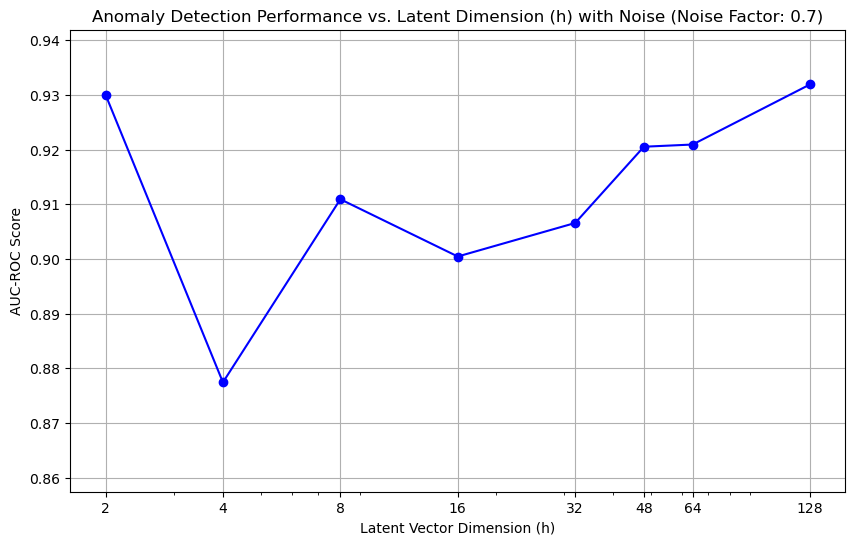

In [9]:
# 모든 h 값에 대한 반복이 끝난 후 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(h_values, auc_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('Latent Vector Dimension (h)')
plt.ylabel('AUC-ROC Score')
plt.title(f'Anomaly Detection Performance vs. Latent Dimension (h) with Noise (Noise Factor: {NOISE_FACTOR})')

# X축을 로그 스케일로 설정
plt.xscale('log')

# 로그 스케일에서 x축 눈금 표시
plt.xticks(h_values, labels=h_values)

plt.grid(True)

# ★★★★ Y축 범위 자동 조정 (이 부분 수정) ★★★★
if len(auc_scores) > 0: # auc_scores가 비어있지 않은 경우에만 계산
    min_auc = min(auc_scores)
    max_auc = max(auc_scores)

    # 최소값보다 약간 작게, 최대값보다 약간 크게 범위를 설정
    # 예를 들어, 최소값 - 0.02, 최대값 + 0.01 또는 데이터에 따라 조절
    y_min_adjusted = max(0.5, min_auc - 0.02) # 최소값은 0.5보다 작아지지 않도록
    y_max_adjusted = min(1.01, max_auc + 0.01) # 최대값은 1.01을 넘지 않도록 (AUC는 1.0이 최대)

    plt.ylim([y_min_adjusted, y_max_adjusted])
else:
    # auc_scores가 비어있는 경우 기본 범위 설정
    plt.ylim([0.5, 1.01])


plt.show()

In [ ]:
import numpy as np
from keras import callbacks
from keras import layers
from keras import models
from keras import optimizers
from keras import utils
from sklearn.metrics import roc_auc_score
from pathlib import Path
import pandas as pd
import keras.api.ops as K

window_size = 150
num_features = 107
batch_size = 64

# --- Conv1D 기반 Autoencoder Model Definition ---
# Conv1D 입력 형태 (batch_size, timesteps, features)
input_shape = (window_size, num_features)

# 인코더
inputs_e = layers.Input(shape=input_shape)
hidden1_e = layers.Conv1D(filters=32, kernel_size=5, activation='relu', padding='same')(inputs_e)
hidden2_e = layers.MaxPooling1D(pool_size=2, padding='same')(hidden1_e)
hidden3_e = layers.Conv1D(filters=16, kernel_size=5, activation='relu', padding='same')(hidden2_e)
hidden4_e = layers.MaxPooling1D(pool_size=2, padding='same')(hidden3_e)
hidden5_e = layers.Conv1D(filters=8, kernel_size=5, activation='relu', padding='same')(hidden4_e) # 38 됨

flatten_e = layers.Flatten()(hidden5_e)
h_dim = 8 #
outputs_e = layers.Dense(h_dim, activation='relu')(flatten_e)

encoder = models.Model(inputs=inputs_e, outputs=outputs_e, name="encoder_model")


# 디코더
inputs_d = layers.Input(shape=(h_dim,))

temp_encoder_for_shape = models.Model(inputs=inputs_e, outputs=hidden5_e)
temp_encoder_output_shape = temp_encoder_for_shape.output_shape
reshaped_timesteps = temp_encoder_output_shape[1]
reshaped_features = temp_encoder_output_shape[2]

hidden1_d = layers.Dense(reshaped_timesteps * reshaped_features, activation='relu')(inputs_d)
hidden2_d = layers.Reshape((reshaped_timesteps, reshaped_features))(hidden1_d)

hidden3_d = layers.Conv1DTranspose(filters=16, kernel_size=5, activation='relu', padding='same', strides=2)(hidden2_d)
hidden4_d = layers.Conv1DTranspose(filters=32, kernel_size=5, activation='relu', padding='same', strides=2)(hidden3_d)

outputs_d = layers.Conv1D(filters=num_features, kernel_size=5, activation='sigmoid', padding='same')(hidden4_d)

decoder = models.Model(inputs=inputs_d, outputs=outputs_d, name="decoder_model")


# Autoencoder 전체 모델
autoencoder_input = layers.Input(shape=input_shape)
autoencoder_encoded = encoder(autoencoder_input)
autoencoder_decoded = decoder(autoencoder_encoded)

autoencoder = models.Model(inputs=autoencoder_input, outputs=autoencoder_decoded, name="autoencoder_model")

autoencoder.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='mse'
)

autoencoder.summary()

Model: "autoencoder_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 107)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_model (Functional)      │ (None, 8)              │        22,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_model (Functional)      │ (None, 152, 107)       │        23,211 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,027 (179.79 KB)

 Trainable params: 46,027 (179.79 KB)

 Non-trainable params: 0 (0.00 B)